<a href="https://colab.research.google.com/github/anshudhanshu/Bank-Marketing-Effectiveness-Prediction/blob/main/Sudhanshu_Rawat_Team_1_Bank_Marketing_Effectiveness_Prediction_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### <b> Social and economic context attributes </b>
* ### emp.var.rate: employment variation rate - quarterly indicator (numeric)
* ### cons.price.idx: consumer price index - monthly indicator (numeric)
* ### cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* ### euribor3m: euribor 3 month rate - daily indicator (numeric)
* ### nr.employed: number of employees - quarterly indicator (numeric)

### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
bank_market = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/bank-full.csv",sep=';')
bank_market.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [8]:
bank_market.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
bank_market.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
bank_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


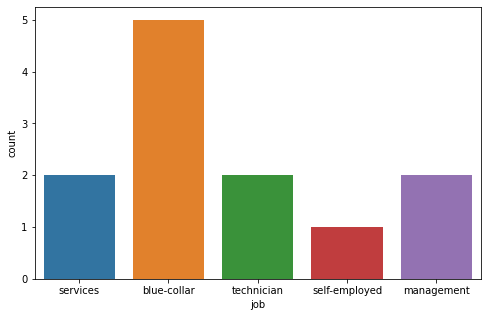

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x=bank_market.job.value_counts(),data=bank_market.job)

In [12]:
bank_market.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [13]:
bank_market.balance.value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [14]:
def oh_encode_cat(df,dep_var):
  cat_vars =  list(set(df.describe().columns)^set(df.columns))
  cat_vars.remove(dep_var)
  data = pd.DataFrame()
  for col in cat_vars:
    data = pd.concat([data,pd.get_dummies(df[col],prefix=col)],axis=1)
  return data

In [15]:
oh_encode_cat(bank_market,'y')

,default_no,default_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_no,loan_yes,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,housing_no,housing_yes,marital_divorced,marital_married,marital_single
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0
45207,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0
45208,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
45209,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0


In [16]:
def plot_cat_data(df,dep_var):
  cat_columns = list(set(df.describe().columns)^set(df.columns))
  cat_columns.remove(dep_var)
  for i,e in enumerate(cat_columns):
    plt.figure(i)
    ax = sns.countplot(df[e],hue=df[dep_var])
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}'.format(height/df.shape[0]),
              ha="center")
    if(len(ax.patches)>10):
      plt.xticks(rotation=90)  
    plt.title(f'Count Plot for {e}')
    plt.show()

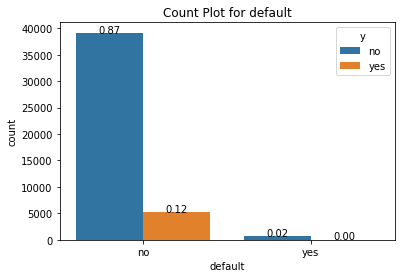

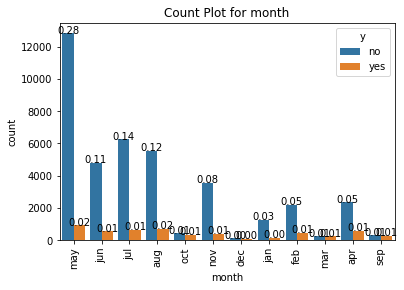

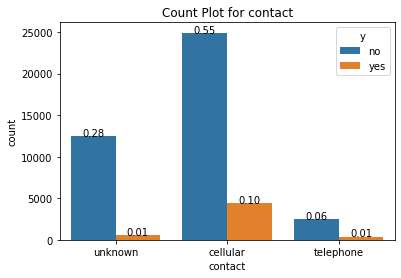

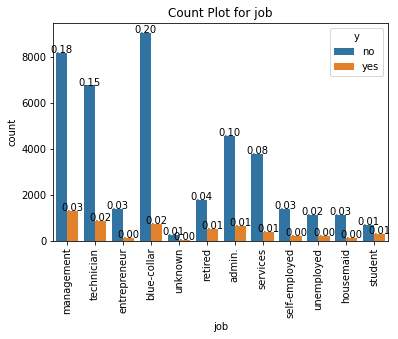

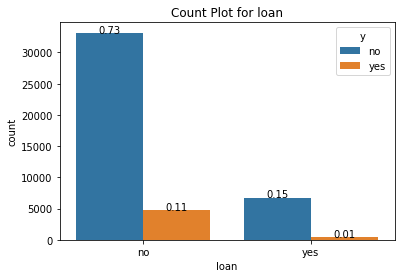

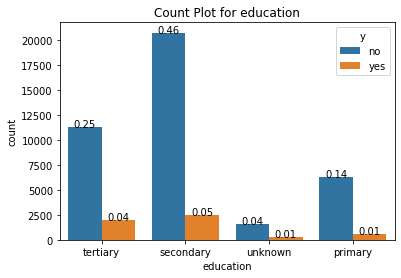

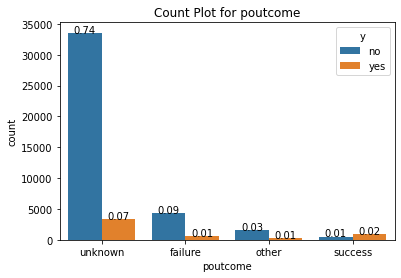

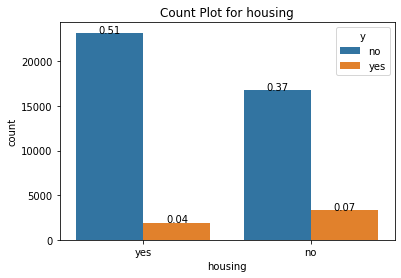

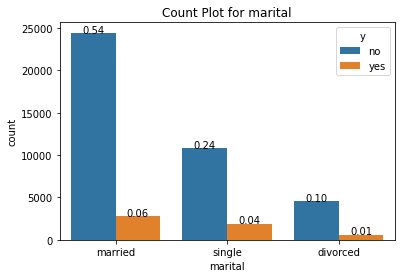

In [17]:
plot_cat_data(bank_market,'y')

Text(0.5, 1.0, 'Distrubtion of balance of rejected customer')

<Figure size 432x288 with 0 Axes>

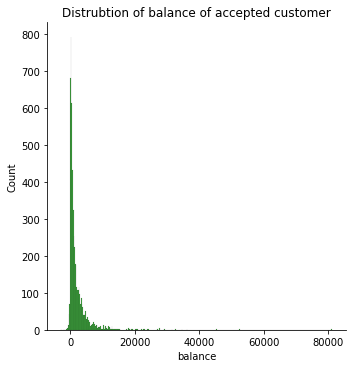

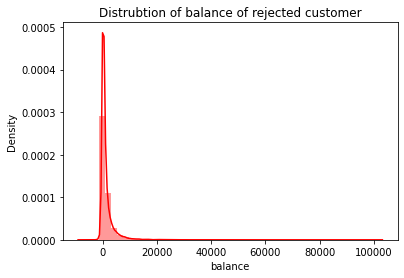

In [27]:
balance_yes=bank_market['balance'][bank_market.y=='yes']
balance_no=bank_market['balance'][bank_market.y=='no']
plt.figure()
sns.displot(balance_yes,color='green')
plt.title('Distrubtion of balance of accepted customer')
plt.figure()
sns.distplot(balance_no,color='red')
plt.title('Distrubtion of balance of rejected customer')

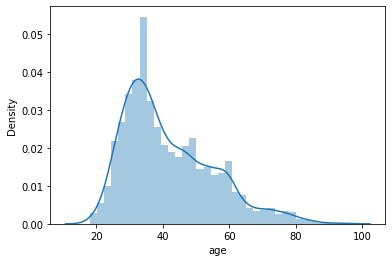

In [30]:
sns.distplot(bank_market[bank_market['y']=='yes'].age)

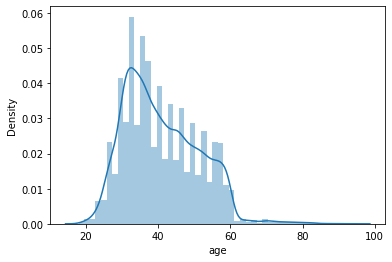

In [31]:
sns.distplot(bank_market[bank_market['y']=='no'].age)

In [37]:
def change_age(age):
  if age<=25:
    return "adult"
  elif age<=40:
    return 'elder'
  elif age<=63:
    return 'retired'
  else:
    return 'old' 

In [33]:
def change_occupation(occ):
  new_cat1 = ['technician','services']
  new_cat2 = ['blue-collar','admin.']
  new_cat3 = ['self-employed','housemaid','entrepreneur']
  if occ in new_cat1:
    return 'new_cat1'
  if occ in new_cat2:
    return 'new_cat2'
  if occ in new_cat3:
    return 'new_cat3'
  return occ

In [42]:
def pdays_contact(days):
  if days == -1:
    return 0
  else:
    return 1

In [86]:
new_df = bank_market.copy()

In [87]:
new_df['new_job'] = new_df['job'].apply(change_occupation)

In [88]:
new_df['cat_age'] = new_df['age'].apply(change_age)

In [89]:
enc_dict = {'no':0,'yes':1}
new_df.housing.replace(enc_dict,inplace=True)
new_df.loan.replace(enc_dict,inplace=True)
new_df.default.replace(enc_dict,inplace=True)
new_df.y.replace(enc_dict,inplace=True)

In [90]:
new_df.contact.replace({'unknown':0, 'cellular':1, 'telephone':1},inplace=True)

In [91]:
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,new_job,cat_age
0,58,management,married,tertiary,0,2143,1,0,0,5,may,261,1,-1,0,unknown,0,management,retired
1,44,technician,single,secondary,0,29,1,0,0,5,may,151,1,-1,0,unknown,0,new_cat1,retired
2,33,entrepreneur,married,secondary,0,2,1,1,0,5,may,76,1,-1,0,unknown,0,new_cat3,elder
3,47,blue-collar,married,unknown,0,1506,1,0,0,5,may,92,1,-1,0,unknown,0,new_cat2,retired
4,33,unknown,single,unknown,0,1,0,0,0,5,may,198,1,-1,0,unknown,0,unknown,elder


In [92]:
new_df['is_contacted_bef'] = new_df['pdays'].apply(pdays_contact)

### Let us do one hot encoding of categorical columns


In [93]:
# One hot encoding
enc_df = pd.get_dummies(new_df, columns=['marital','education','poutcome','cat_age','new_job']).drop(['age','job','month','day','duration','pdays'],axis=1)

In [94]:
enc_df.head()

,default,balance,housing,loan,contact,campaign,previous,y,is_contacted_bef,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cat_age_adult,cat_age_elder,cat_age_old,cat_age_retired,new_job_management,new_job_new_cat1,new_job_new_cat2,new_job_new_cat3,new_job_retired,new_job_student,new_job_unemployed,new_job_unknown
0,0,2143,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,0,29,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,0,2,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1506,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


### Now let us check for anomalies

In [95]:
from sklearn.ensemble import IsolationForest
isf= IsolationForest(contamination=0.01)
isf.fit(enc_df.drop('y',axis=1))

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [96]:
anomaly = pd.Series(isf.predict(enc_df.drop('y',axis=1)))
anomaly.value_counts()

 1    44758
-1      453
dtype: int64

In [97]:
anomaly_df = enc_df.copy()
anomaly_df['anomaly']= anomaly

In [98]:
anomaly_df.head()

,default,balance,housing,loan,contact,campaign,previous,y,is_contacted_bef,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cat_age_adult,cat_age_elder,cat_age_old,cat_age_retired,new_job_management,new_job_new_cat1,new_job_new_cat2,new_job_new_cat3,new_job_retired,new_job_student,new_job_unemployed,new_job_unknown,anomaly
0,0,2143,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
1,0,29,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
2,0,2,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0,1506,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1


In [99]:
final_df = anomaly_df[anomaly_df['anomaly']==1].drop('anomaly',axis=1)

In [100]:
final_df

,default,balance,housing,loan,contact,campaign,previous,y,is_contacted_bef,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cat_age_adult,cat_age_elder,cat_age_old,cat_age_retired,new_job_management,new_job_new_cat1,new_job_new_cat2,new_job_new_cat3,new_job_retired,new_job_student,new_job_unemployed,new_job_unknown
0,0,2143,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,0,29,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,0,2,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1506,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,0,505,0,1,1,2,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
45206,0,825,0,0,1,3,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
45207,0,1729,0,0,1,2,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
45209,0,668,0,0,1,4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
